# **PART A**



In [37]:
import pandas as pd
from seaborn import heatmap
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from gensim import corpora, models
from pyLDAvis.gensim_models import prepare
import pickle
import pyLDAvis
from sklearn.feature_extraction.text import TfidfTransformer

In [7]:
df = pd.read_json("https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json")
df.head()

,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [19]:
infile = open("/content/drive/Othercomputers/Mi portátil/Master/GitHub/twsm-PERSONAL/Data/Stemmed.pkl","rb")
df["preprocessed"] = pickle.load(infile)
df.head()

,content,target,target_names,preprocessed
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos,car wonder enlighten car saw dai door sport ca...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,clock poll final final clock report acceler cl...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,question folk mac plu final gave ghost weekend...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics,weitek robert kyanko rob rjck uucp wrote abrax...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,shuttl launch question articl cowcb world std ...


In [29]:
topics = ("soc.religion.christian","rec.sport.hockey","talk.politics.mideast","rec.motorcycles")

df = df.query("target_names in @topics")
df.head()

,content,target,target_names,preprocessed
10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,8,rec.motorcycles,recommend duc worth ducati gt line ducati gt m...
21,From: leunggm@odin.control.utoronto.ca (Gary L...,10,rec.sport.hockey,nhl team captain articl apr samba oit unc edu ...
28,From: jonh@david.wheaton.edu (Jonathan Hayward...,15,soc.religion.christian,pantheism environment articl apr atho rutger e...
33,From: ayr1@cunixa.cc.columbia.edu (Amir Y Rose...,17,talk.politics.mideast,isra expans lust articl spam math adelaid edu ...
35,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey,goali mask articl netnew upenn edu kkeller mai...


In [63]:
tf = TfidfVectorizer(input="content", analyzer='word', min_df = 0.1, max_df=0.7)
data_tfidfd =  tf.fit_transform(df["preprocessed"])
words = tf.get_feature_names()

print(data_tfidfd)

  (0, 17)	0.33544937258220753
  (0, 73)	0.36555188807681127
  (0, 50)	0.33580168139295474
  (0, 40)	0.22021468205489403
  (0, 75)	0.234338066291223
  (0, 84)	0.28090737824955475
  (0, 7)	0.6773219143587931
  (1, 11)	0.25688658806889286
  (1, 4)	0.22003105615870414
  (1, 30)	0.49705477996061803
  (1, 54)	0.23453584683538858
  (1, 77)	0.1729363304428382
  (1, 14)	0.5063914729760625
  (1, 88)	0.11734393762665593
  (1, 18)	0.26547292394056626
  (1, 0)	0.16623353909938846
  (1, 1)	0.13313249774086092
  (1, 71)	0.2374388170527295
  (1, 75)	0.3334745609648598
  (2, 55)	0.11795039576399541
  (2, 47)	0.1226068319851145
  (2, 56)	0.1425842508322982
  (2, 8)	0.13650498634021774
  (2, 74)	0.4549847042296853
  (2, 27)	0.12400088691787133
  :	:
  (2359, 9)	0.09391169723026421
  (2359, 21)	0.08642283604760895
  (2359, 83)	0.07012472386180234
  (2359, 53)	0.09312543122061022
  (2359, 13)	0.1539151442334852
  (2359, 38)	0.08263012918561993
  (2359, 37)	0.061476785707594184
  (2359, 43)	0.18967410461073

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# **PART B**

In [67]:
kmeans = KMeans(n_clusters = 4, max_iter=1000, random_state=42)
kmeans.fit(data_tfidfd)

KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [68]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
  print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : god, christian, believ, peopl, edu, think, know, question, rutger, word
1 : game, team, plai, hockei, edu, year, write, new, think, time
2 : edu, israel, write, peopl, articl, new, know, time, right, like
3 : com, bike, dod, articl, write, edu, like, apr, good, new


In [70]:
df["cluster"] = kmeans.labels_
df.head()

,content,target,target_names,preprocessed,cluster
10,From: irwin@cmptrc.lonestar.org (Irwin Arnstei...,8,rec.motorcycles,recommend duc worth ducati gt line ducati gt m...,3
21,From: leunggm@odin.control.utoronto.ca (Gary L...,10,rec.sport.hockey,nhl team captain articl apr samba oit unc edu ...,1
28,From: jonh@david.wheaton.edu (Jonathan Hayward...,15,soc.religion.christian,pantheism environment articl apr atho rutger e...,0
33,From: ayr1@cunixa.cc.columbia.edu (Amir Y Rose...,17,talk.politics.mideast,isra expans lust articl spam math adelaid edu ...,2
35,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey,goali mask articl netnew upenn edu kkeller mai...,2


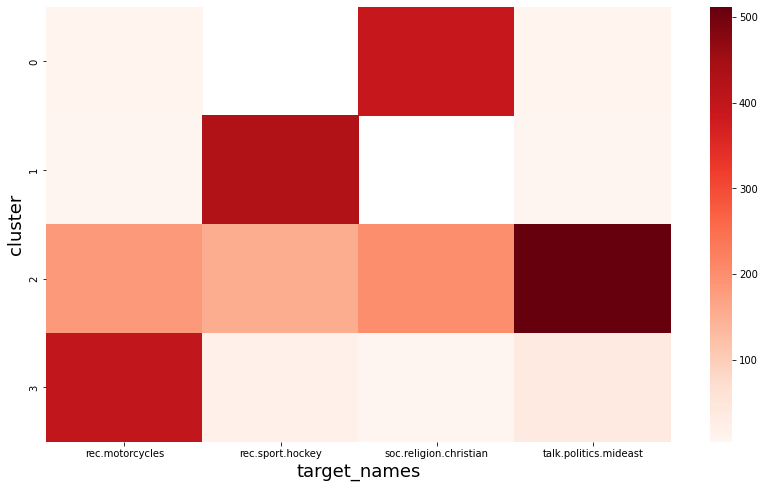

In [73]:
clusters = df.groupby(['cluster', 'target_names']).size()
fig, ax1 = plt.subplots(figsize = (14, 8))
heatmap(clusters.unstack(level = 'target_names'), ax = ax1, cmap = 'Reds')
ax1.set_xlabel('target_names').set_size(18)
ax1.set_ylabel('cluster').set_size(18)

# **Part C**

In [76]:
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, remove_stopwords, strip_short, stem_text

In [74]:
df["preprocessed"]

10       recommend duc worth ducati gt line ducati gt m...
21       nhl team captain articl apr samba oit unc edu ...
28       pantheism environment articl apr atho rutger e...
33       isra expans lust articl spam math adelaid edu ...
35       goali mask articl netnew upenn edu kkeller mai...
                               ...                        
11298    nhl team milwauke read report possibl nhl move...
11299    turkei cypru bosnia serbia greec armenia azeri...
11300    arrog christian previou articl phsd vaxc monas...
11305    hezbollah apr yuma acn colost edu repli long l...
11313    stolen cbrrr stolen pasadena blue white honda ...
Name: preprocessed, Length: 2361, dtype: object

In [78]:
data_stripped = []
for i in df["preprocessed"]:
    text = i.lower() #remove upper case letters to allow grouping
    #text = remove_stopwords(text)
    text = strip_punctuation(text) #remove all instances of . and : 
    #text = strip_tags(text)
    text = strip_numeric(text) #remove all numbers (because uninterpretable, i guess)
    text = strip_multiple_whitespaces(text) #remove dupplicate spaces
    #text = strip_short(text)
    data_stripped.append(text)

data_stripped

['recommend duc worth ducati gt line ducati gt model clock run paint bronz brown orang fade leak bit oil pop hard accel shop fix tran oil leak sold bike owner want think like opinion email thank nice stabl mate beemer jap bike axi motor tuba irwin honk computrac richardson irwin cmptrc lonestar org dod',
 'nhl team captain articl apr samba oit unc edu scott mark launchpad unc edu scott mark write cours mike ramsei time captain buffalo prior trade pittsburgh current penguin captain real captain lemieux plai rotat season mario troi lonei worn pen think mike foligno captain sabr got trade leaf wasn rick vaiv captain leaf got trade chicago steve thoma olcyzk speak leaf believ darryl sittler captain torn jersei think claim captainci later trade flyer yeah cours gretzki captain oiler trade wasn gari',
 'pantheism environment articl apr atho rutger edu cleveland freenet edu gari cavano write new group mayb cover anybodi current emphasi environ turn unintention cours pantheism ye adamantli env

In [87]:
text_tokens = [[text for text in data_stripped.split()] for data_stripped in data_stripped]
dictionary = corpora.Dictionary(text_tokens)

In [88]:
print(dictionary)

Dictionary(21445 unique tokens: ['accel', 'axi', 'beemer', 'bike', 'bit']...)


In [96]:
corpus = dictionary.doc2bow(data_stripped)
print(corpus) #?

[]
